### Preparing The Notebook For Analysis
- Importiong Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ignoring Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")


### Adjusting The Row - Column View


In [3]:
#setting the display option to display max row & columns 
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option('display.width', 1000)


###  Reading The Files

In [4]:
#loading the 1st file with the help of pandas library
app_df=pd.read_csv("application_data.csv")

In [5]:
#checking the 1st 10 rows
app_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#loading the 2nd file
prev_df=pd.read_csv("previous_application.csv")

In [7]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Some Sanity Checks of The Datasets

after loading the two dataset we are gonna inspect some basic information,such as shape, the datatypes and some numerical estimates.

In [8]:
# printing the shape of the two datasets
print("application data shape:", app_df.shape)
print("previous application data shape:", prev_df.shape)

application data shape: (307511, 122)
previous application data shape: (1670214, 37)


checking the datatypes of all the column

In [9]:
#1st dataframe info
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
#2nd dataframe info
prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

checking the numeric estimates of the columns

In [11]:
#1st dataframe
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
#2nd dataframe
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Data Cleaning 

after the basic operations are performed on the datasets now we should move to the next step which is data cleaning.
this is the most important part of an EDA, this includes handling null values, setting the data with its correct datatypes, and a lot more than that.

#### Searching for the Null Values 

In [13]:
# checking the sum of the null values of 1st dataframe
app_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [14]:

#calculating the percentage of the null values and rounding it off by 2 decimal
app_df.isnull().sum()/app_df.shape[0]*100


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [15]:
#creating a new dataframe with the null value percentage along with the column name
null_app_df=pd.DataFrame(app_df.isnull().sum()/app_df.shape[0]*100).reset_index()
null_app_df.columns=["Column Name", "Null value percentage"]    
null_app_df

,Column Name,Null value percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [16]:
# checking the null value percentage that are above or equal to 40%
null_40_app=null_app_df[null_app_df["Null value percentage"] >= 40]
null_40_app

,Column Name,Null value percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [17]:
#length of the null values with 40% and higher
len(null_40_app)

49

just like the "application" dataset, we are gonna follow the same steps with the "previous_application" dataset to search for the null values.

In [18]:
# checking the sum of the null values of 2nd dataframe
prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [19]:
#calculating the percentage of the null values
prev_df.isnull().sum()/prev_df.shape[0]*100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [20]:
#creating a new dataframe with the null value percentage along with the column name
null_prev_df=pd.DataFrame(prev_df.isnull().sum()/prev_df.shape[0]*100).reset_index()
null_prev_df.columns=["Column Name", "Null value percentage"]    
null_prev_df

,Column Name,Null value percentage
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [21]:
# checking the null value percentage that are above or equal to 40%
null_40_prev=null_prev_df[null_prev_df["Null value percentage"] >= 40]
null_40_prev

,Column Name,Null value percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [22]:
#length of the null values with 40% and higher
len(null_40_prev)

11

as we saw,the miising value column count in application dataset is 49 and thus in the previous dataset is 11.
this columns can be dropped, as it contains a large number of missing values, hence if we try to impute those it can affect our analysis.
but here i am not dropping any columns as it also causes data loss, i am just ignoring these columns from my analysis.
let us create a list of columns that can be dropped.

In [23]:
list(null_app_df["Column Name"])

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [24]:
#list of all the drop columns of the application df
drop_app=list(null_40_app["Column Name"])

In [25]:
drop_app

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

apart from the missing value columns, there are also some unnecessary columns that are of no use to us, so we can also delete them,based on observation from the column description list the columns that seems to be least important to me i am including them in the drop list.


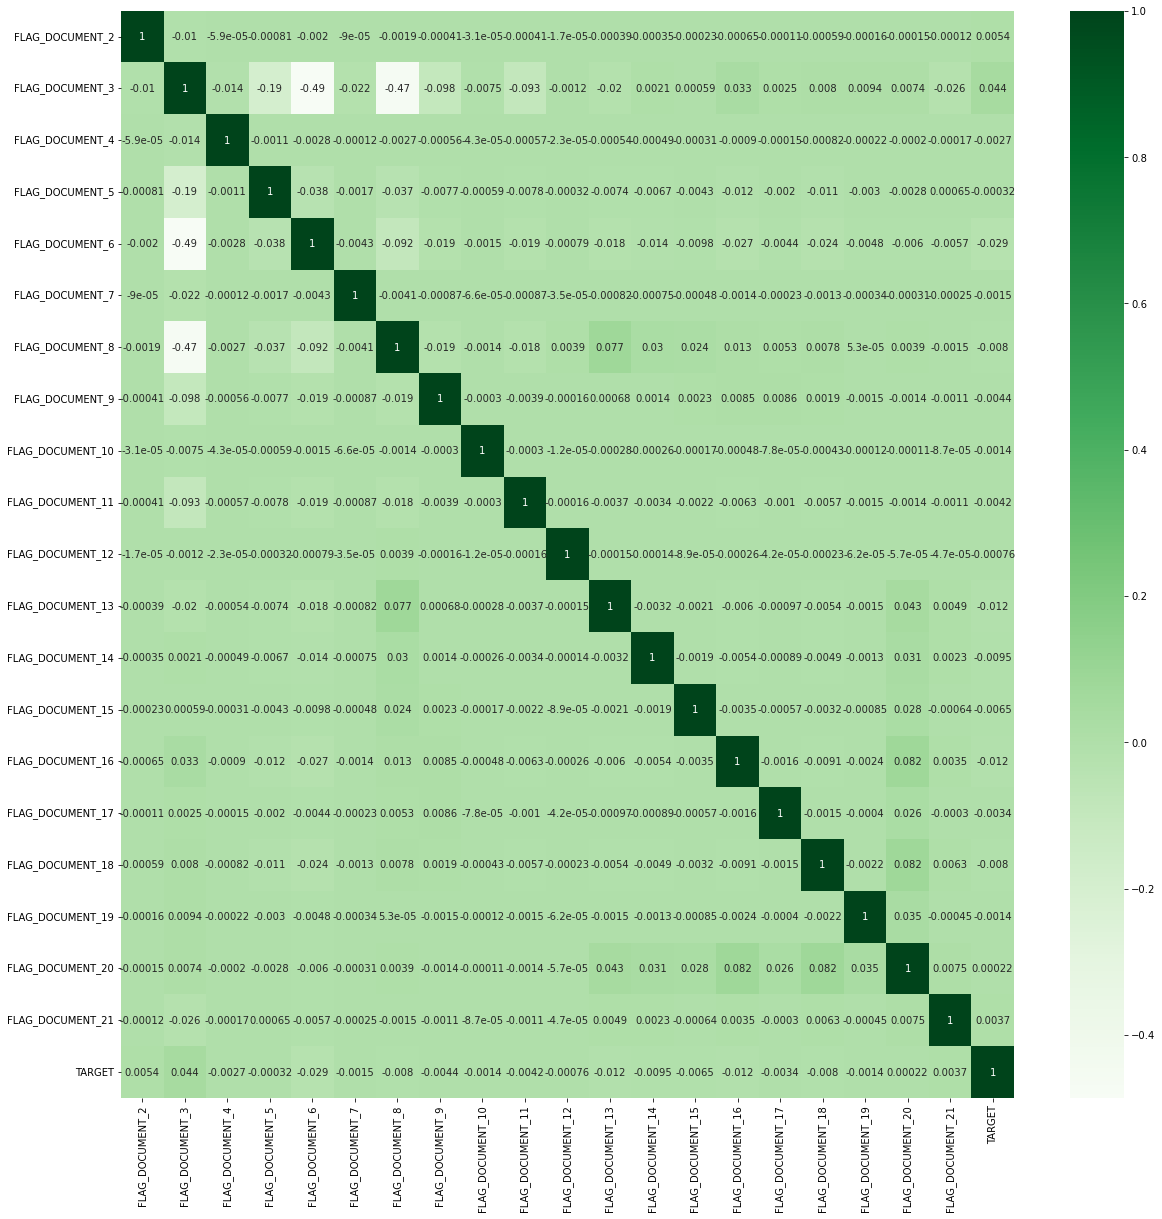

In [26]:
#checking the correlation between the flag documents and the target variable,
#and plotting a heatmap
fig= plt.figure(figsize=(20,20))
flag_doc = app_df[["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7",
                                          "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
                                           "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19",
                                           "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","TARGET"]]
flag_doc_corr=flag_doc.corr()
sns.heatmap(flag_doc_corr,cmap="Greens",annot=True)
plt.show()

as we can see there is no such high correlation between the flag documents and the target variable, except for "FLAG_DOCUMENT_3",so these columns are too of no use to our analysis, these column can also be dropped.

In [27]:
#adding the flag documents in the drop list
drop_app=list(null_40_app["Column Name"])+["FLAG_DOCUMENT_2","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7",
                                          "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13",
                                           "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19",
                                           "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","EXT_SOURCE_2","EXT_SOURCE_3"]


in the drop list there are two more columns are included named "EXT_SOURCE_2","EXT_SOURCE_3", as they are not really useful according to me "EXT_SOURCE_1" is already include as it has over 50% of missing values, and "EXT_SOURCE_3" has 20% of null values, so these column can be deleted.

In [28]:
print(drop_app)
len(drop_app)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

70

In [29]:
#list of drooped columns in previous df
drop_prev=list(null_40_prev["Column Name"]) 

In [30]:
print(drop_prev)
len(drop_prev)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


11

leaving 70 columns from application dataset, and 11 columns from previous application dataset we are gonna work with the dataset with the rest of the columns.

### Convertion of data Types

In [31]:
#checking the categorical columns for application dataset
app_df.nunique().sort_values(ascending=True)

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [32]:
#checking the datatypes of the column (1st dataframe)
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


as we can see numerical columns are already in int64 or float64 format,
but we have to convert some of these into categorical column from numeric or oject.
first we are gonna make a list of all categorical columns, and loop through it.

In [33]:
cat_col_app=["NAME_CONTRACT_TYPE","NAME_INCOME_TYPE","CODE_GENDER","NAME_TYPE_SUITE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE","WEEKDAY_APPR_PROCESS_START","FLAG_OWN_CAR","FLAG_OWN_REALTY","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","REG_REGION_NOT_WORK_REGION","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]
for i in cat_col_app:
    app_df[i]=pd.Categorical(app_df[i])

In [34]:
app_df.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
OWN_CAR_AGE                      float64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE 

In [35]:
# checking the categorical columns for previous application dataset
prev_df.nunique().sort_values(ascending=True)

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [36]:
# checking the datatypes(2nd dataframe)
prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [37]:
cat_col_prev=["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO",'NAME_PRODUCT_TYPE',"CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","NAME_CONTRACT_TYPE"]
for i in cat_col_prev:
    prev_df[i]=pd.Categorical(prev_df[i])

In [38]:
prev_df.dtypes

SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_DOWN_PAYMENT                float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
FLAG_LAST_APPL_PER_CONTRACT      object
NFLAG_LAST_APPL_IN_DAY            int64
RATE_DOWN_PAYMENT               float64
RATE_INTEREST_PRIMARY           float64
RATE_INTEREST_PRIVILEGED        float64
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                  object
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category


#### Days cannot be negative so converting them into positive by taking abs 

In [39]:
days_app=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
for i in days_app:
    app_df[i]=abs(app_df[i])

#### Creating a new column for age

In [40]:
app_df['AGE']=app_df["DAYS_BIRTH"]//365

In [41]:
# creating age buckets
app_df['AGE_BUCKET']=pd.cut(app_df.AGE,[0,30,40,50,60,9999],labels=["below30","30-40","40-50","50-60","60above"])

In [42]:
app_df['AGE_BUCKET'].value_counts(normalize=True)

30-40      0.270290
40-50      0.241946
50-60      0.220542
below30    0.171721
60above    0.095502
Name: AGE_BUCKET, dtype: float64

In [43]:
app_df["AMT_INCOME_TOTAL"]=app_df["AMT_INCOME_TOTAL"]/100000

In [44]:
#creating income buckets
app_df['INCOME_BUCKET']=pd.cut(app_df.AMT_INCOME_TOTAL,[0,1,2,3,4,5,6,7,8,9,10,100],labels=["below100K","100K-200K","200K-300K","300K-400K","400K-500K","500K-600K","600K-700K","700K-800K","800K-900K","900K-1M","1Mabove"])

In [45]:
app_df['INCOME_BUCKET'].value_counts(normalize=True)

100K-200K    0.506972
200K-300K    0.211949
below100K    0.207143
300K-400K    0.047726
400K-500K    0.017434
500K-600K    0.003561
600K-700K    0.002826
800K-900K    0.000969
1Mabove      0.000803
700K-800K    0.000527
900K-1M      0.000091
Name: INCOME_BUCKET, dtype: float64

In [46]:
#creating experince from the days employed
app_df["EMPLOYED_YEARS"]=app_df["DAYS_EMPLOYED"]//365
app_df["EXPERIENCE"]=pd.cut(app_df.EMPLOYED_YEARS,[0,10,20,30,40,1000],labels=["lessthan10","10-20","20-30","30-40","morethan40"])
app_df["EXPERIENCE"].value_counts(normalize=True)

lessthan10    0.645967
morethan40    0.198668
10-20         0.116800
20-30         0.030074
30-40         0.008490
Name: EXPERIENCE, dtype: float64

In [47]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
days_prev=["DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_DECISION","DAYS_LAST_DUE","DAYS_TERMINATION"]
for i in days_prev:
    prev_df[i]=abs(prev_df[i])

### Missing Value Imputation

to move ahead in the analysis, there are columns with lesser percentage of missing values, so we can impute those missing values whos percentages are below 40% or so.
There are few strategies to impute the missing values for CATEGORICAL columns and NUMERICAL columns.
* for CATEGORICAL columns we are gonna impute the missing values with the MODE of it.
* for NUMERICAL columns we are gonna use the MEAN/MEDIAN approach.

Now let us check the null value percentage again for each column.



- for the application dataset

In [49]:

(app_df.isnull().sum()/app_df.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

As we can see the column NAME_TYPE_SUITE had 0.42% of nulls and it is a CATEGORICAL column so we are gonna impute the nulls of it with the mode of it.

In [50]:
app_df["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [51]:
app_df["NAME_TYPE_SUITE"].fillna(app_df["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [52]:
app_df["NAME_TYPE_SUITE"].isnull().sum()

0

as we can see now the nulls in "NAME_TYPE_SUITE" is 0, indicating the nulls are succesfully imputed.

Next we can see the column named OCCUPATION_TYPE has nulls over 30%,and this is also a CATEGORICAL column, so we are gonna apply the same strategy as we did earlier.

In [53]:
app_df["OCCUPATION_TYPE"].mode()[0]

'Laborers'

but, it wouldnot be correct to impute it with mode of it, because 30% is a very high number, and if we impute it with the mode our analysis wouldbe biased, so here we are gonna impute it with a new category "Not Mentioned". 

before that we ahve to add a ew category to the existing ones.

In [54]:
app_df["OCCUPATION_TYPE"]=app_df["OCCUPATION_TYPE"].cat.add_categories("Not Mentioned")
app_df["OCCUPATION_TYPE"].fillna("Not Mentioned",inplace=True)

In [55]:
app_df["OCCUPATION_TYPE"].isnull().sum()

0

as we can see now the nulls in "OCCUPATION_TYPE" is 0, indicating the nulls are succesfully imputed.

Next up , we can see the columns named 
- "AMT_REQ_CREDIT_BUREAU_HOUR",
- "AMT_REQ_CREDIT_BUREAU_DAY",
- "AMT_REQ_CREDIT_BUREAU_WEEK",
- "AMT_REQ_CREDIT_BUREAU_MON",
- "AMT_REQ_CREDIT_BUREAU_QRT",
- "AMT_REQ_CREDIT_BUREAU_YEAR" 

has nulls of more than 13%, and these all are numerical values, so we are gonna impute these with the median of each, we can use the mean too, but mean is often affected by the outliers, so median is always safe to be imputed.

In [56]:
app_df[["AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


as we can see the 50 percentile, or the median is "0"

In [57]:
amt_list=["AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in amt_list:
    app_df[i].fillna(app_df[i].median(),inplace=True)

In [58]:
app_df[["AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR"]].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

as we can see now the nulls in ["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"] is 0, indicating the nulls are succesfully imputed.

There are still some columns left with some missing values e.g.:
- OBS_30_CNT_SOCIAL_CIRCLE 
- DEF_30_CNT_SOCIAL_CIRCLE         
- OBS_60_CNT_SOCIAL_CIRCLE         
- DEF_60_CNT_SOCIAL_CIRCLE         
- DAYS_LAST_PHONE_CHANGE
- AMT_ANNUITY                      
- AMT_GOODS_PRICE  

but we can choose not to impute those, cause the percentage of the nulls are very less, and will not affect our analysis further.

-  for the previous application dataset

In [59]:
(prev_df.isnull().sum()/prev_df.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

as we can see the column "AMT_ANNUITY","AMT_GOODS_PRICE","CNT_PAYMENT" has a null value of 22%, and it is a numerical column so we are gonna impute it with its median.

In [60]:
fill=["AMT_ANNUITY","CNT_PAYMENT","AMT_GOODS_PRICE"]
for i in fill:
    prev_df[i].fillna(prev_df[i].median(),inplace=True)

In [61]:
prev_df["AMT_ANNUITY"].isnull().sum()

0

In [62]:
prev_df["CNT_PAYMENT"].isnull().sum()

0

In [63]:
prev_df["AMT_GOODS_PRICE"].isnull().sum()

0

### Checking The Outliers

- for the application dataset

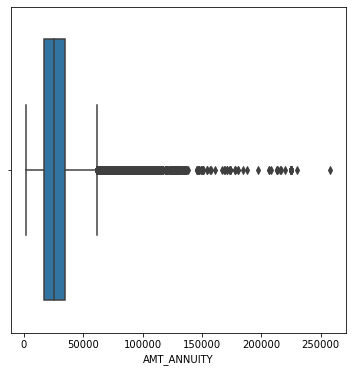

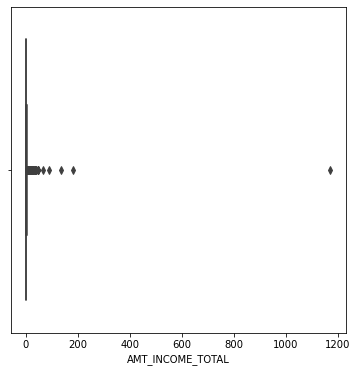

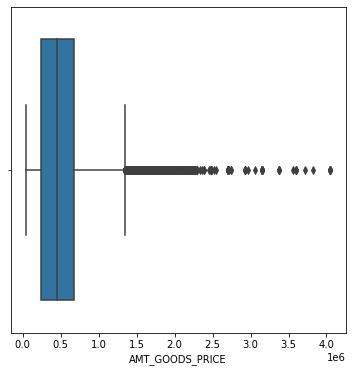

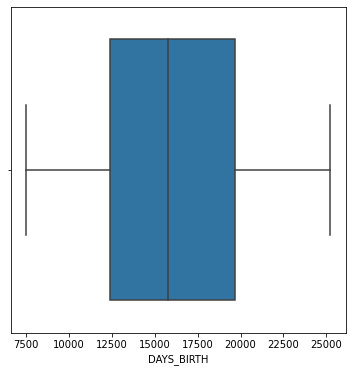

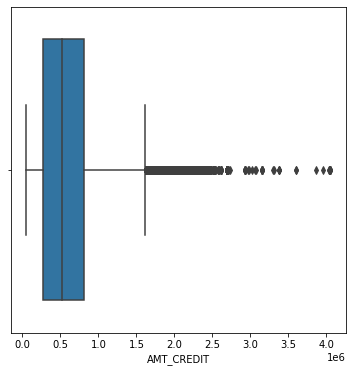

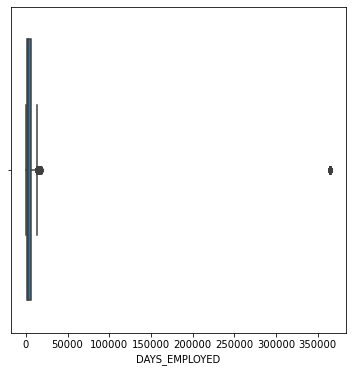

In [64]:

out_app=["AMT_ANNUITY","AMT_INCOME_TOTAL","AMT_GOODS_PRICE","DAYS_BIRTH","AMT_CREDIT","DAYS_EMPLOYED"]
for i in out_app:
    plt.figure(figsize=(6,6))
    sns.boxplot(app_df[i])
    plt.show()

As we can clearly see that most of the columns do contain outliers, except for the column "DAYS_BIRTH".



- for the previous application dataset

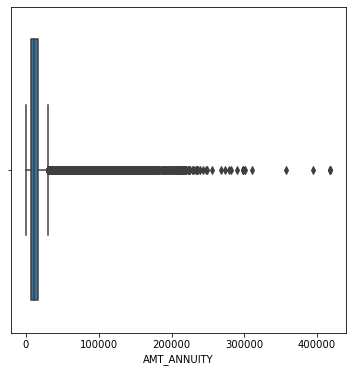

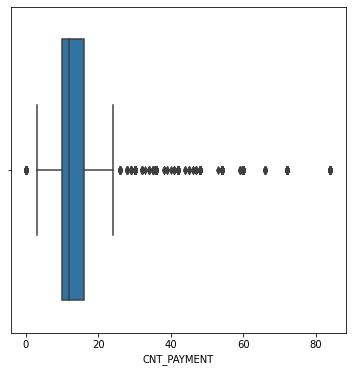

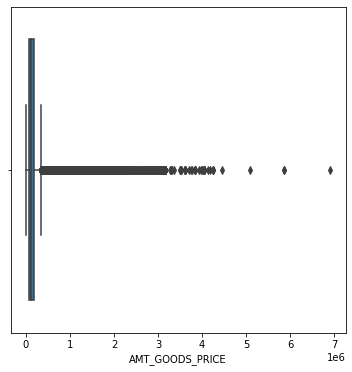

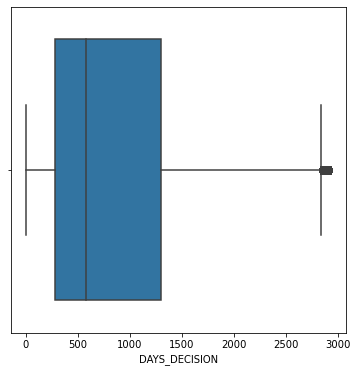

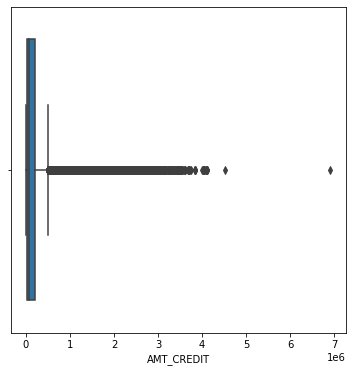

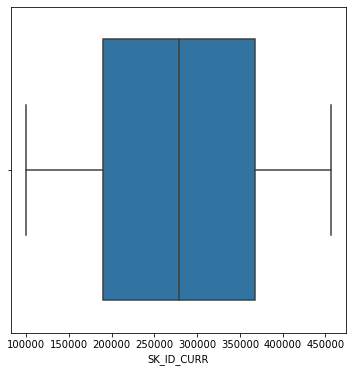

In [65]:
out_prev=["AMT_ANNUITY","CNT_PAYMENT","AMT_GOODS_PRICE","DAYS_DECISION","AMT_CREDIT","SK_ID_CURR"]
for i in out_prev:
    plt.figure(figsize=(6,6))
    sns.boxplot(prev_df[i])
    plt.show()

From the above graphs we can infer -
- SK_ID_CURR has no outliers and DAYS_DECISION has almost no outliers.
- CNT_PAYMENT has very few outliers.
- AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT has large number of outliers.

### Checking Data Imbalance

- For application dataset

In [66]:
app_df["TARGET"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

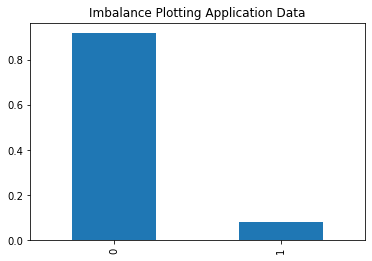

In [67]:
app_df["TARGET"].value_counts(normalize=True).plot.bar()
plt.title("Imbalance Plotting Application Data")
plt.show()

Here 0 represents the repayer and 1 represents the defaulter.

As we can clearly see the DATA IMBALANCE ratio of repayer and defaulter is 91.93 and 8.07

- for previous application dataset

In [68]:
prev_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

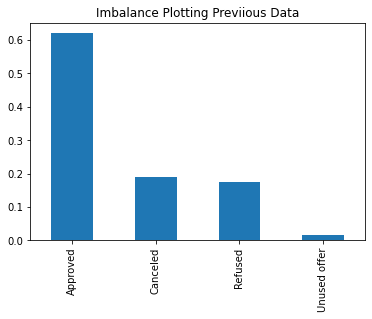

In [69]:
prev_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.title("Imbalance Plotting Previious Data")
plt.show()

As we can clearly see the DATA IMBALANCE in the previous application dataset is as follows:

- 62% of the previous loans were approved.
- 18.94% of the previous loans were canceled.
- 17.40% of the previous loans werwe refused.

### Univariate Analysis
- application dataset

- Categorical Columns

#### Contract Type

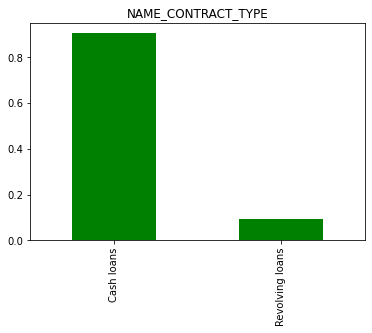

In [70]:
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_CONTRACT_TYPE")
plt.show()

- Cash loans are very high in portions.(80% - 90%)
- Revolving Loanns are very low in portions.(around 10%)

#### Gender

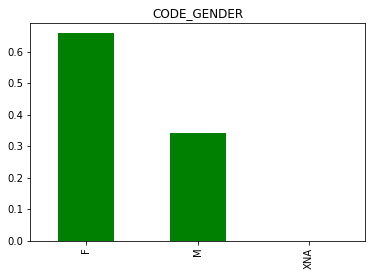

In [71]:
app_df.CODE_GENDER.value_counts(normalize=True).plot.bar(color="green")
plt.title("CODE_GENDER")
plt.show()

- Female applicants are more in numbers than Male applicants.

#### Car

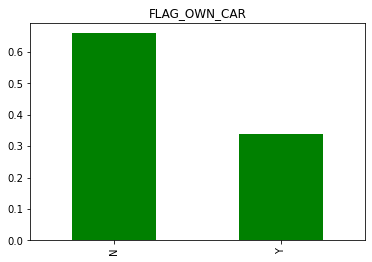

In [72]:
app_df.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(color="green")
plt.title("FLAG_OWN_CAR")
plt.show()

 - Applicants who own a car are very smaller in numbers than the applicants who dont.

#### Suite Type

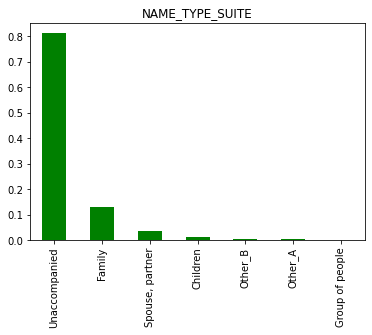

In [73]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_TYPE_SUITE")
plt.show()

While applying for previous application:
- Almost 80% of the applicants were unaccompanied.
- 10%-20% were accompanied by their family.
- few were with their spouse's partner.

#### Education Type


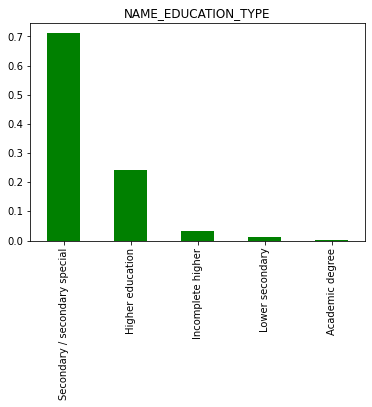

In [74]:
app_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_EDUCATION_TYPE")
plt.show()

- Almost 70% of the applicants belong from secondary type education.
- 20%-30% have higher education,
- Below 10% belong from incomplete higher education. 

#### Income Type

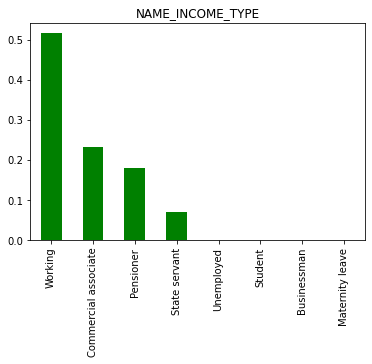

In [75]:
app_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_INCOME_TYPE")
plt.show()

- A little more than 50% are working.
- 20%-30% are commercial associate.
- 10%-20% are pensioners.
- Below 10% work as state servant.

#### Family Status

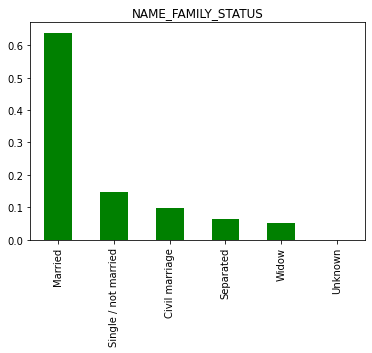

In [76]:
app_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_FAMILY_STATUS")
plt.show()

- 60%-70% are married.
- 10%-20% are single.
- Few are civil married, and few are separated.

#### Housing Type

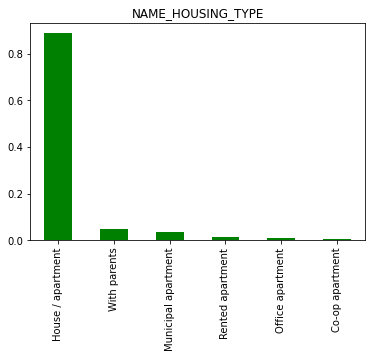

In [77]:
app_df.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("NAME_HOUSING_TYPE")
plt.show()

- 80%-90% live in the house/apartment.
- some live with parents.
- some live in the municipal apartment.

#### Occupation Type

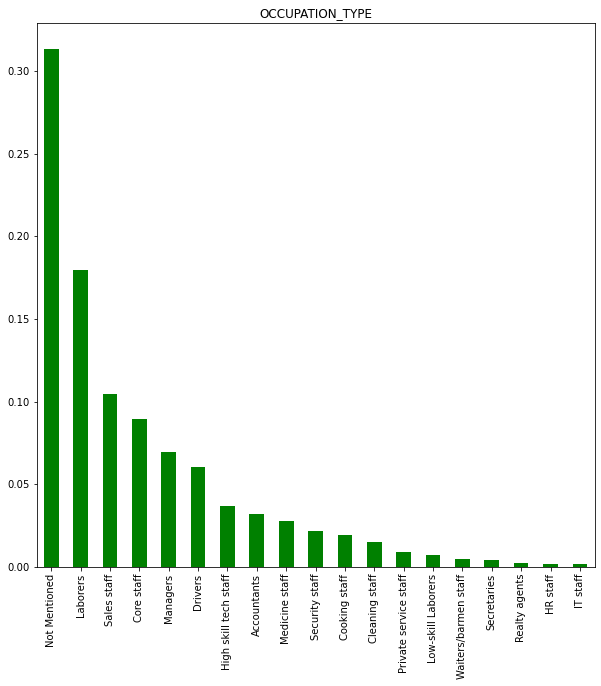

In [78]:
plt.figure(figsize=(10,10))
app_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("OCCUPATION_TYPE")
plt.show()

- more than 30% of the applicants preferred not mentioning their occupation type.
- 15%-20% are laborers.
- 10% are sales staff.
- 8%-10% are core staff.
- 5%-8% are managers.
- 5%-8% are drivers.
- few of them are accountants, medicine staff, security staff, cooking staff, cleaning staff belonging in the rest of the portions.

#### Organization Type

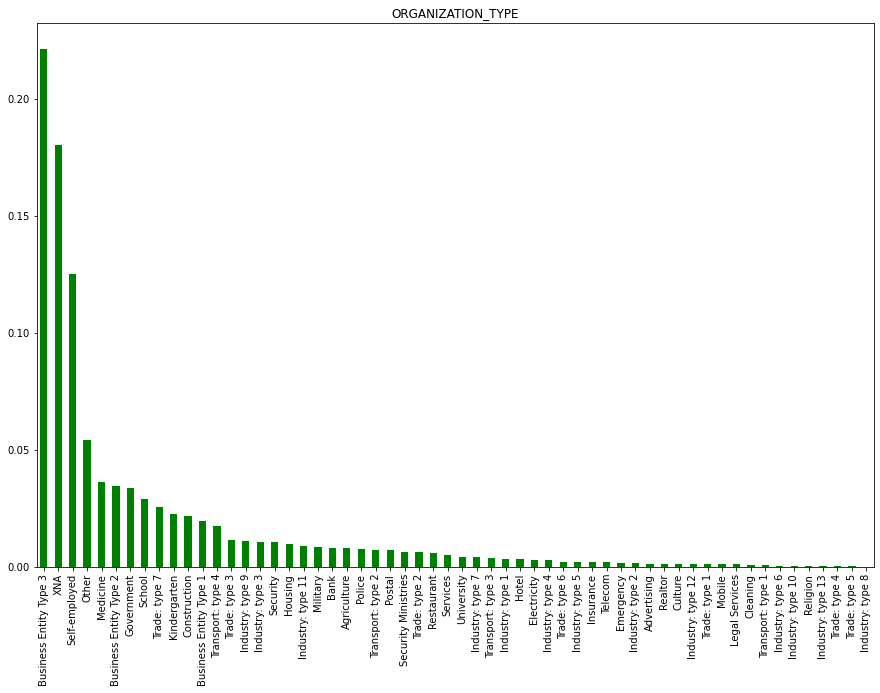

In [79]:
plt.figure(figsize=(15,10))
app_df.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar(color="green")
plt.title("ORGANIZATION_TYPE")
plt.show()

- 20%-25% work in business entity type 3
- 15%-20% are not available.
- 10%-15% are self employed.
- 5% belong from others.
- 3%-5% are from medicine.
- 3%-5% are from business entity type 2
- 3%-5% are from government.
- 3%-4% are from school.
- 3% are from trade type 7.
- below 1% are from services.
- 1%-2% are from police.
- and there are much more


#### Age Bucket

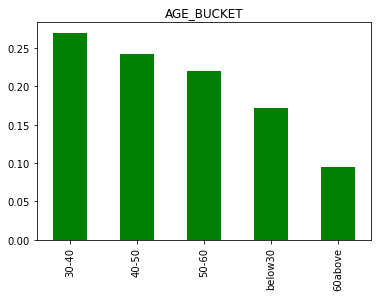

In [80]:
app_df.AGE_BUCKET.value_counts(normalize=True).plot.bar(color="green")
plt.title("AGE_BUCKET")
plt.show()

- 25% belong in the age of 30-40
- 20%-25% belong in 40-50
- around 22% are from 50-60

#### Income Bucket

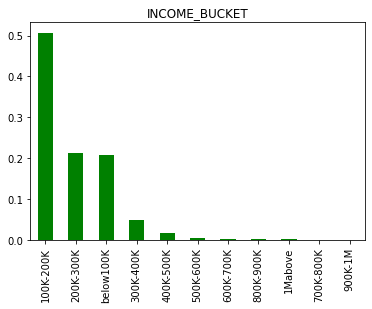

In [81]:
app_df.INCOME_BUCKET.value_counts(normalize=True).plot.bar(color="green")
plt.title("INCOME_BUCKET")
plt.show()

- almost 50% people have income between 100k-200k
- almots 20% have 200k-300k
- 20% of the people have income below 100k

#### Experience

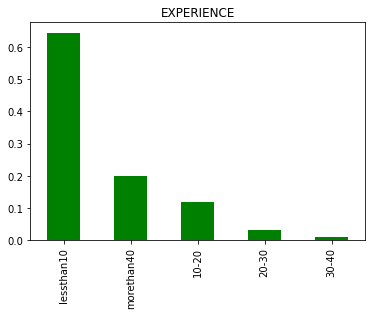

In [82]:
app_df.EXPERIENCE.value_counts(normalize=True).plot.bar(color="green")
plt.title("EXPERIENCE")
plt.show()

- 60% of the people have experience of 1-10yeras.

#### Numbers Of Children

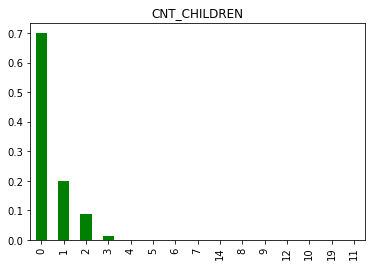

In [83]:
app_df.CNT_CHILDREN.value_counts(normalize=True).plot.bar(color="green")
plt.title("CNT_CHILDREN")
plt.show()

- almost 70% of them have no children.
- almost 20% have one, a little less than 10% have two,
- and very few have 3.

#### Number of Family Members

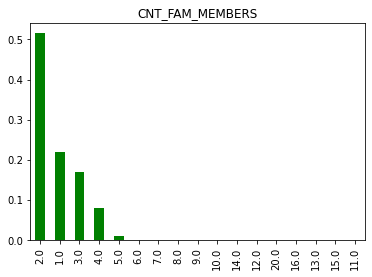

In [84]:
app_df.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar(color="green")
plt.title("CNT_FAM_MEMBERS")
plt.show()

- 50% have a count of 2 members.
- 20% have 1 menmber.
- 10%-20% have 3 members.
- few have 4.

#### Credit Amount

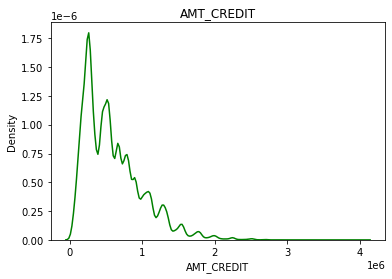

In [85]:
sns.distplot(app_df["AMT_CREDIT"],hist=False,color="green")
plt.title("AMT_CREDIT")
plt.show()

- There are more number of people belong in the low credit amount.

#### Annuity Amount

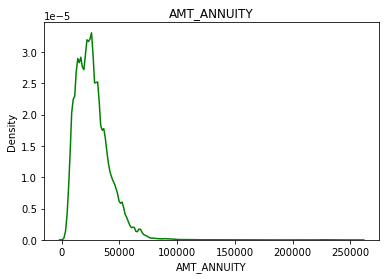

In [86]:
sns.distplot(app_df["AMT_ANNUITY"],hist=False,color="green")
plt.title("AMT_ANNUITY")
plt.show()

- There are more number of people belong in the low annuity amount.

#### Goods Price Amount

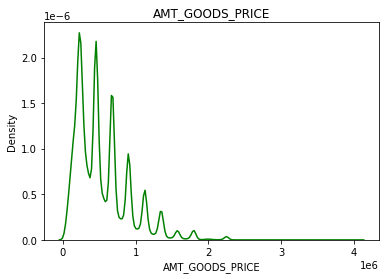

In [87]:
sns.distplot(app_df["AMT_GOODS_PRICE"],hist=False,color="green")
plt.title("AMT_GOODS_PRICE")
plt.show()

#### Total Income Amount

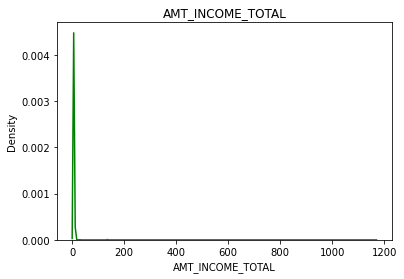

In [88]:
sns.distplot(app_df["AMT_INCOME_TOTAL"],hist=False,color="green")
plt.title("AMT_INCOME_TOTAL")
plt.show()

### Segmented Univariate Analysis

we are going to divde the target variable into two halves 
- target=0 : Repayer
- target=1 : Defaulter

In [89]:
repayer=app_df[app_df["TARGET"]==0]

In [90]:
defaulter=app_df[app_df["TARGET"]==1]

In [91]:
repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_BUCKET,INCOME_BUCKET,EMPLOYED_YEARS,EXPERIENCE
1,100003,0,Cash loans,F,N,N,0,2.700,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,200K-300K,3,lessthan10
2,100004,0,Revolving loans,M,Y,Y,0,0.675,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50-60,below100K,0,NaN
3,100006,0,Cash loans,F,N,Y,0,1.350,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,

In [92]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_BUCKET,INCOME_BUCKET,EMPLOYED_YEARS,EXPERIENCE
0,100002,1,Cash loans,M,N,Y,0,2.025,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,below30,200K-300K,1,lessthan10
26,100031,1,Cash loans,F,N,Y,0,1.125,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,50-60,100K-200K,7,lessthan10
40,100047,1,Cash loans,M,N,Y,0,2.025,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.99

####  Age Bucket

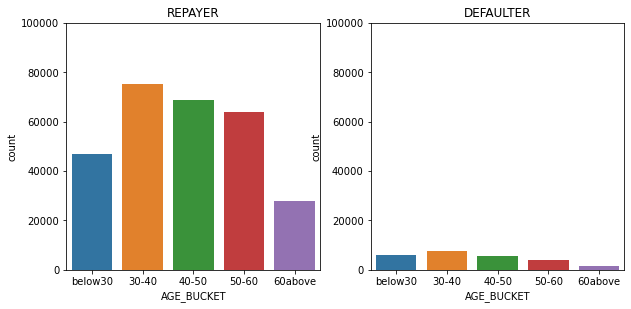

In [93]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,100000)
plt.title("REPAYER")
sns.countplot(repayer["AGE_BUCKET"])
plt.subplot(2,2,2)
plt.ylim(0,100000)
plt.title("DEFAULTER")
sns.countplot(defaulter["AGE_BUCKET"])
plt.show()

- 30-40 age group have the high numbers in repaying the loans on time.
- 40-50 age group are also good in repaying.
- 50-60 age group are better than the age group below30.

####  Income Bucket

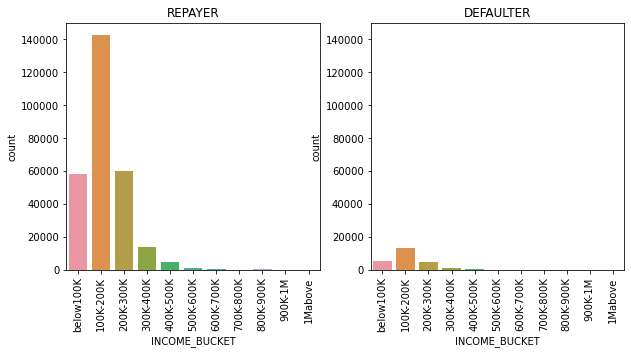

In [94]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,150000)
plt.title("REPAYER")
sns.countplot(repayer["INCOME_BUCKET"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,150000)
plt.title("DEFAULTER")
sns.countplot(defaulter["INCOME_BUCKET"])
plt.xticks(rotation=90)
plt.show()

- people having income between 100k-200k are better performer in terms of repaying the loan.
- below100k and 200k-300k are of almost same margin.

####  Experience

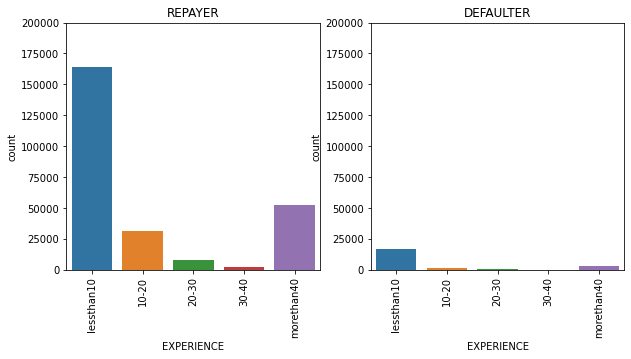

In [95]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,200000)
plt.title("REPAYER")
sns.countplot(repayer["EXPERIENCE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,200000)
plt.title("DEFAULTER")
sns.countplot(defaulter["EXPERIENCE"])
plt.xticks(rotation=90)
plt.show()

- people having experience less than 10 years repay the laon on time.
- a very few of them also tend to default.

####  Name Contract Type

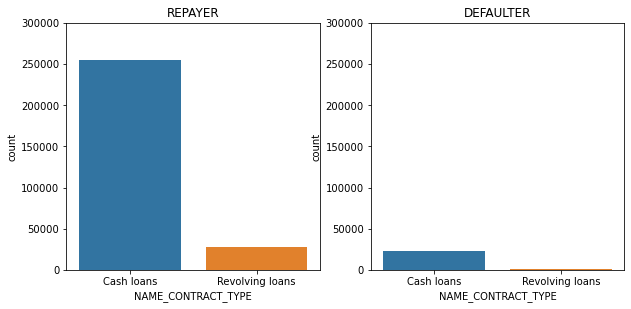

In [96]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,300000)
plt.title("REPAYER")
sns.countplot(repayer["NAME_CONTRACT_TYPE"])
plt.subplot(2,2,2)
plt.ylim(0,300000)
plt.title("DEFAULTER")
sns.countplot(defaulter["NAME_CONTRACT_TYPE"])
plt.show()

- most of the cash loans and Revolving loans are repayed on time.
- some cash loans were also defaulted.

#### Code Gender

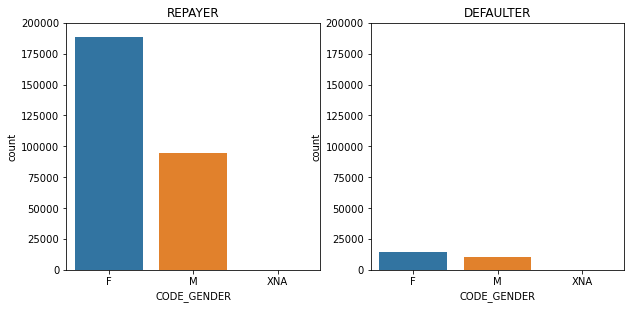

In [97]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.ylim(0,200000)
plt.title("REPAYER")
sns.countplot(repayer["CODE_GENDER"])
plt.subplot(2,2,2)
plt.ylim(0,200000)
plt.title("DEFAULTER")
sns.countplot(defaulter["CODE_GENDER"])
plt.show()


- females are the better repayer than the males.

#### Occupation Type

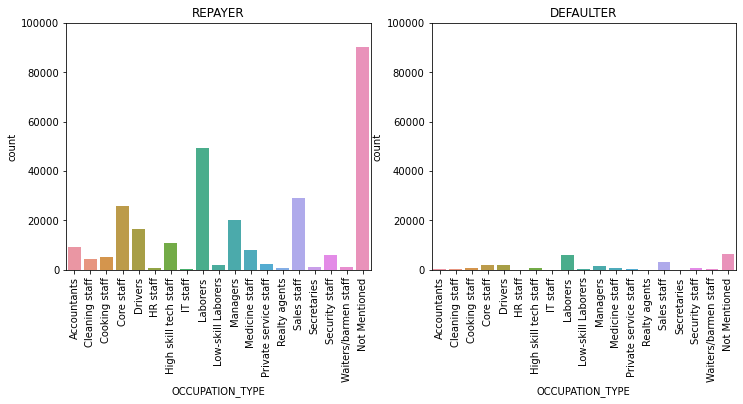

In [98]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,100000)
plt.title("REPAYER")
sns.countplot(repayer["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,100000)
plt.title("DEFAULTER")
sns.countplot(defaulter["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.show()


- most of the repayers belong from the not mentioned category.
- laborers are also good at repaying the laon on time.
- HR staffs are less likely to repay the loan on time.

#### Income Type

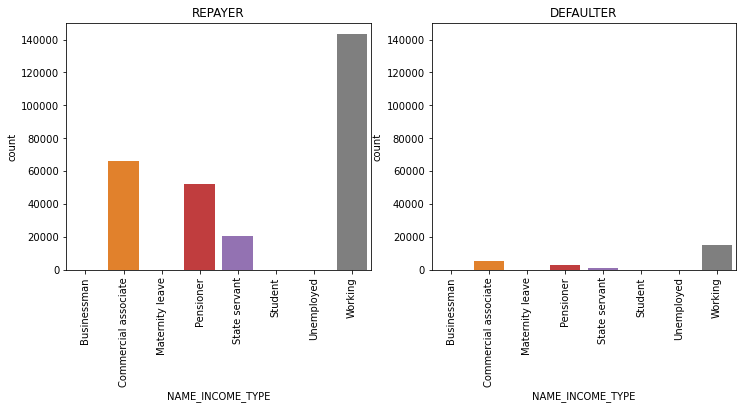

In [99]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,150000)
plt.title("REPAYER")
sns.countplot(repayer["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,150000)
plt.title("DEFAULTER")
sns.countplot(defaulter["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.show()


- working people do repay the loan on time.
- follwed by the commercial associate.
- a few in working people do default.

#### Name Education Type

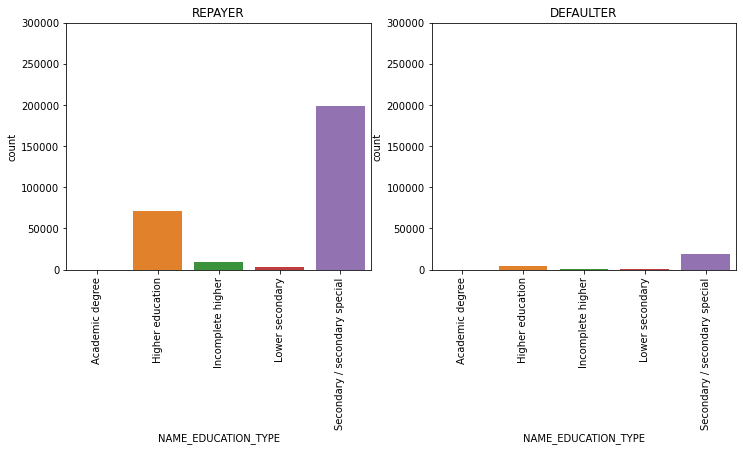

In [100]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,300000)
plt.title("REPAYER")
sns.countplot(repayer["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,300000)
plt.title("DEFAULTER")
sns.countplot(defaulter["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.show()


- people belonging from the secondary education are better repayer than people having higher education.

#### Name Family Status

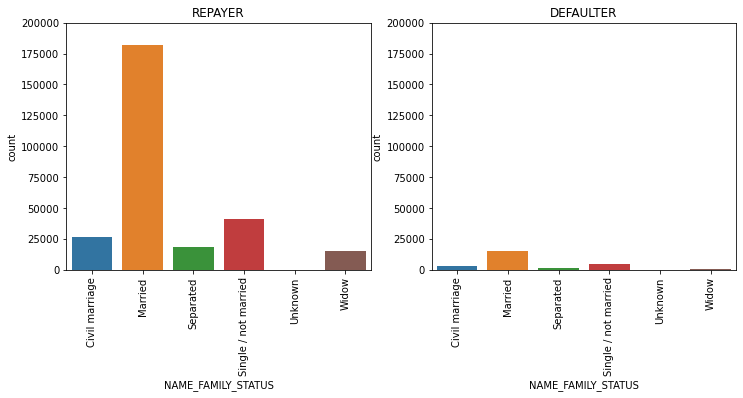

In [101]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,200000)
plt.title("REPAYER")
sns.countplot(repayer["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,200000)
plt.title("DEFAULTER")
sns.countplot(defaulter["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.show()


- married persons repay on time
- single persons are better repayer than the civil married or separated.
- but, civil married and separated default very less.

#### Name Housing Type

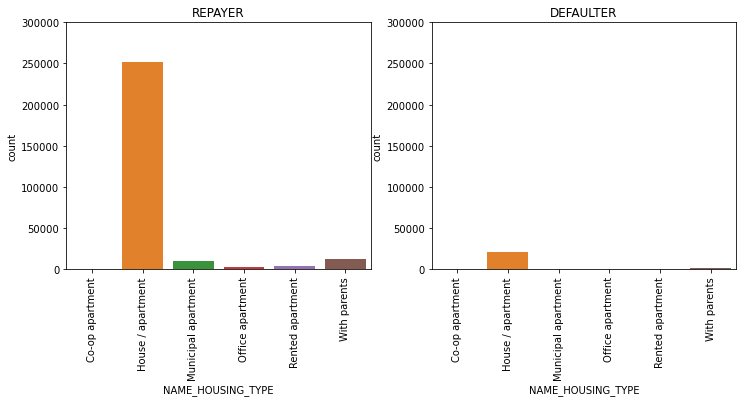

In [102]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,300000)
plt.title("REPAYER")
sns.countplot(repayer["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,300000)
plt.title("DEFAULTER")
sns.countplot(defaulter["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.show()


- people living in house /apartment repay the loan on time, and a few of them do deafault.
- people living in municipal apartment , with parents and others do not default at all.


#### Flag Own Car

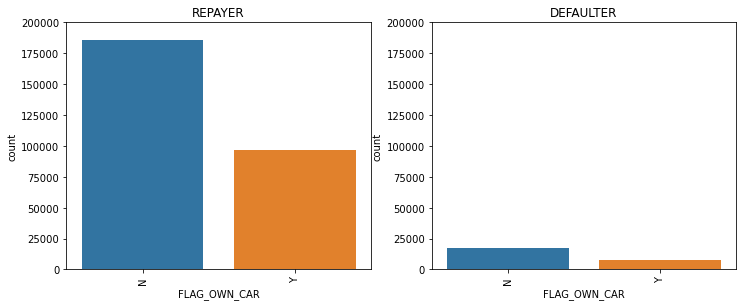

In [103]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.ylim(0,200000)
plt.title("REPAYER")
sns.countplot(repayer["FLAG_OWN_CAR"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,200000)
plt.title("DEFAULTER")
sns.countplot(defaulter["FLAG_OWN_CAR"])
plt.xticks(rotation=90)
plt.show()


- people having no car are better repayers than the people owning a car.

#### Organization Type

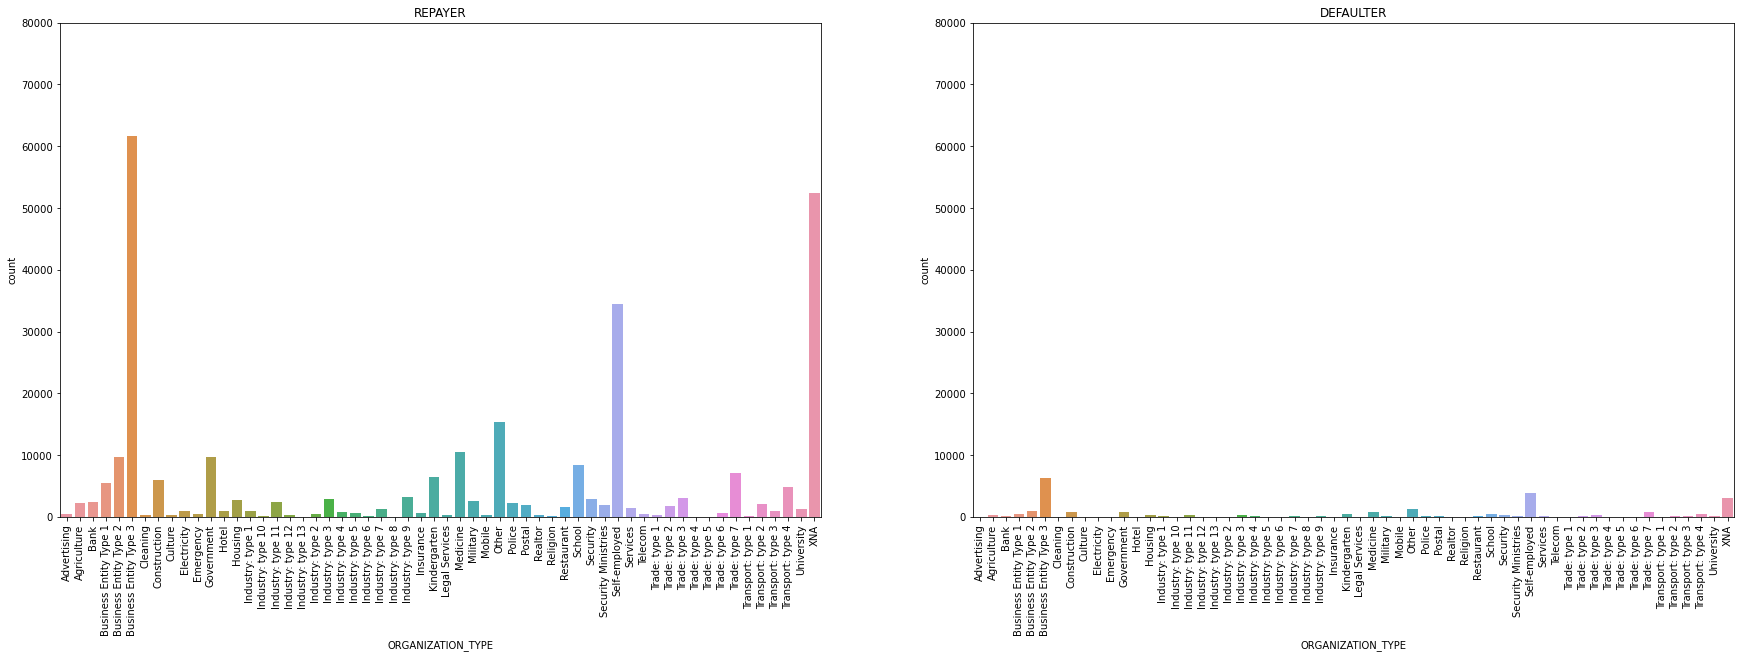

In [104]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.ylim(0,80000)
plt.title("REPAYER")
sns.countplot(repayer["ORGANIZATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,80000)
plt.title("DEFAULTER")
sns.countplot(defaulter["ORGANIZATION_TYPE"])
plt.xticks(rotation=90)
plt.show()


- business entity type 3 persons are the best repaying loan on time.
- self employed persos are also good at repaying.

#### Credit Amount

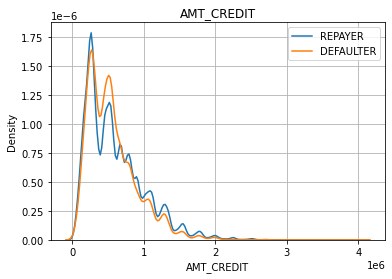

In [105]:
sns.distplot(repayer["AMT_CREDIT"],hist=False, label="REPAYER")
sns.distplot(defaulter["AMT_CREDIT"],hist=False, label="DEFAULTER")
plt.title("AMT_CREDIT")
plt.grid()
plt.legend()
plt.show()

- loan amount credit is low, and risk of defaulting is high.

#### Annuity Amount

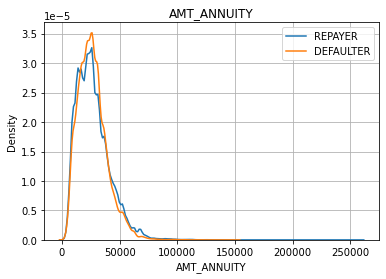

In [106]:
sns.distplot(repayer["AMT_ANNUITY"],hist=False, label="REPAYER")
sns.distplot(defaulter["AMT_ANNUITY"],hist=False, label="DEFAULTER")
plt.title("AMT_ANNUITY")
plt.grid()
plt.legend()
plt.show()

- when amount annuity is equal or below 60000, people are likely to default.

#### Goods Price Amount

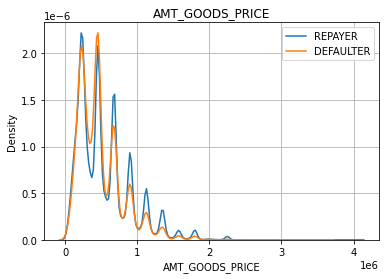

In [107]:
sns.distplot(repayer["AMT_GOODS_PRICE"],hist=False, label="REPAYER")
sns.distplot(defaulter["AMT_GOODS_PRICE"],hist=False, label="DEFAULTER")
plt.title("AMT_GOODS_PRICE")
plt.grid()
plt.legend()
plt.show()

- amount of goods prices are low, defaults are high.

#### Total Income Amount

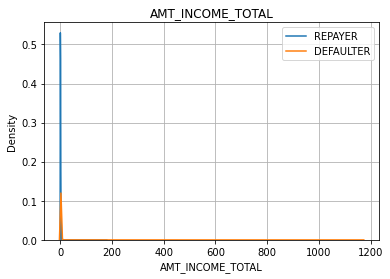

In [108]:
sns.distplot(repayer["AMT_INCOME_TOTAL"],hist=False, label="REPAYER")
sns.distplot(defaulter["AMT_INCOME_TOTAL"],hist=False, label="DEFAULTER")
plt.title("AMT_INCOME_TOTAL")
plt.grid()
plt.legend()
plt.show()

### Bi-Variate Analysis

- for Numerical Analysis 

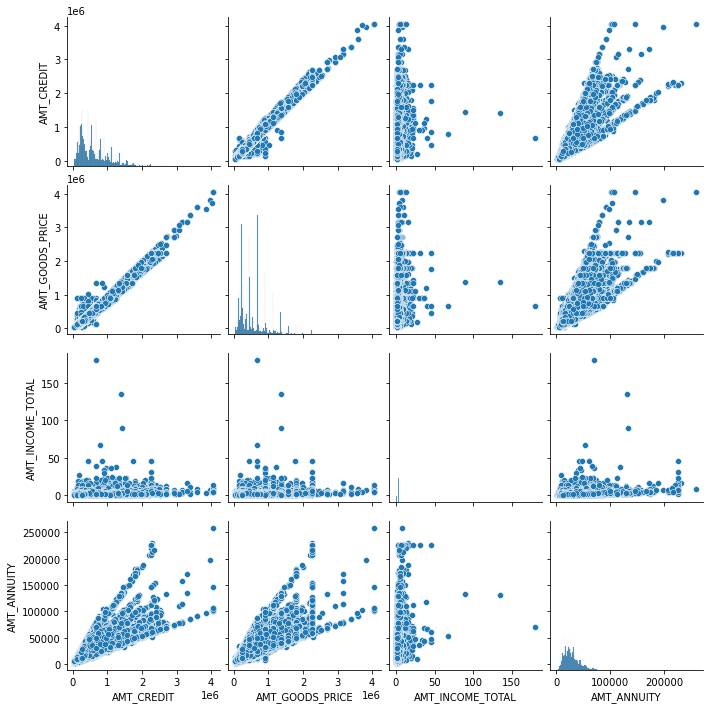

In [109]:
sns.pairplot(data=repayer,vars=["AMT_CREDIT","AMT_GOODS_PRICE","AMT_INCOME_TOTAL","AMT_ANNUITY"])
plt.show()

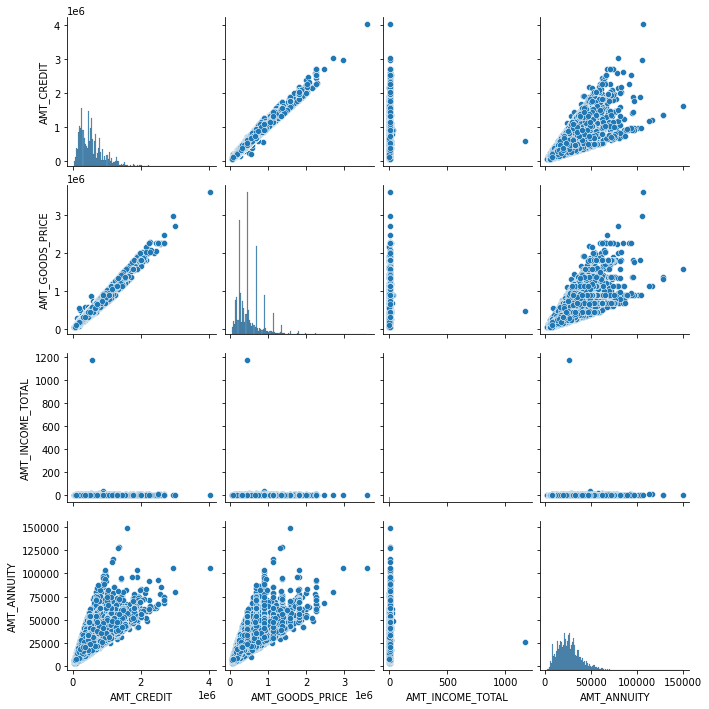

In [110]:
sns.pairplot(data=defaulter,vars=["AMT_CREDIT","AMT_GOODS_PRICE","AMT_INCOME_TOTAL","AMT_ANNUITY"])
plt.show()

- people who paid the loan amount on timw are more likely to get higher credit than who didnot pay on time.
- people who have high goods prices and paid the loan on time have higher credits, than who didnot pay on time.

- numeric-categorical analysis

#### Income Bucket vs Gender

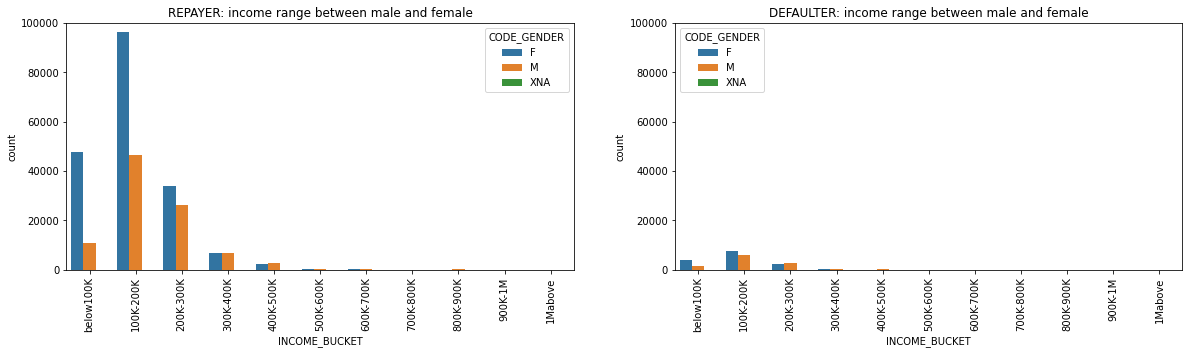

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.ylim(0,100000)
plt.title("REPAYER: income range between male and female")
sns.countplot(x="INCOME_BUCKET",hue="CODE_GENDER",data=repayer)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.ylim(0,100000)
plt.title("DEFAULTER: income range between male and female")
sns.countplot(x="INCOME_BUCKET",hue="CODE_GENDER",data=defaulter)
plt.xticks(rotation=90)
plt.show()

- female having income between 100k-200k are better repayers than male.

#### Credit Amount vs Education Status

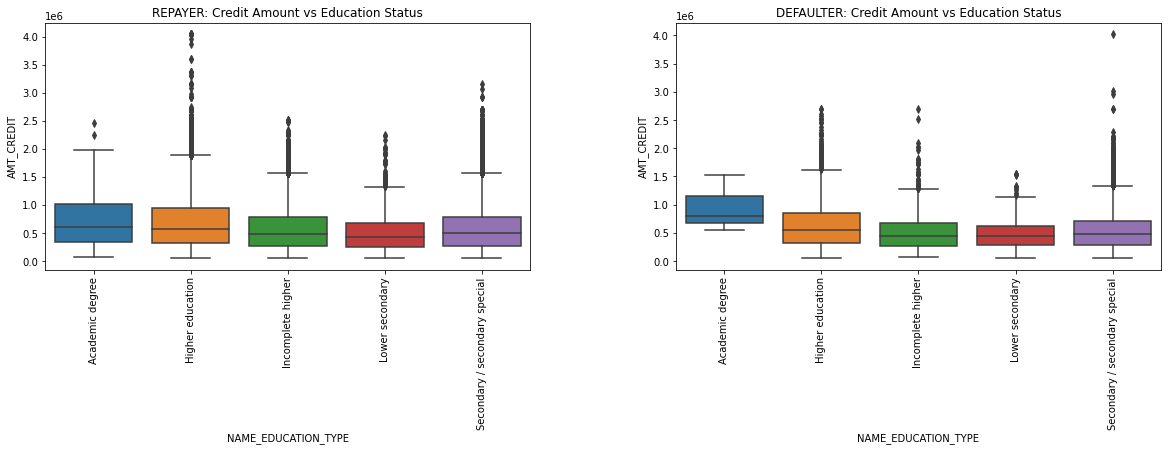

In [112]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(2,2,1)

plt.title("REPAYER: Credit Amount vs Education Status")
sns.boxplot(y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",data=repayer)
plt.xticks(rotation=90)
plt.subplot(2,2,2)

plt.title("DEFAULTER: Credit Amount vs Education Status")
sns.boxplot(y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",data=defaulter)
plt.xticks(rotation=90)
plt.show()

- academic degree, higher education and secondary education has pretty much same median credit amount.
- higher education has more outliers than the secondary education.

#### Income Amount vs Education Status

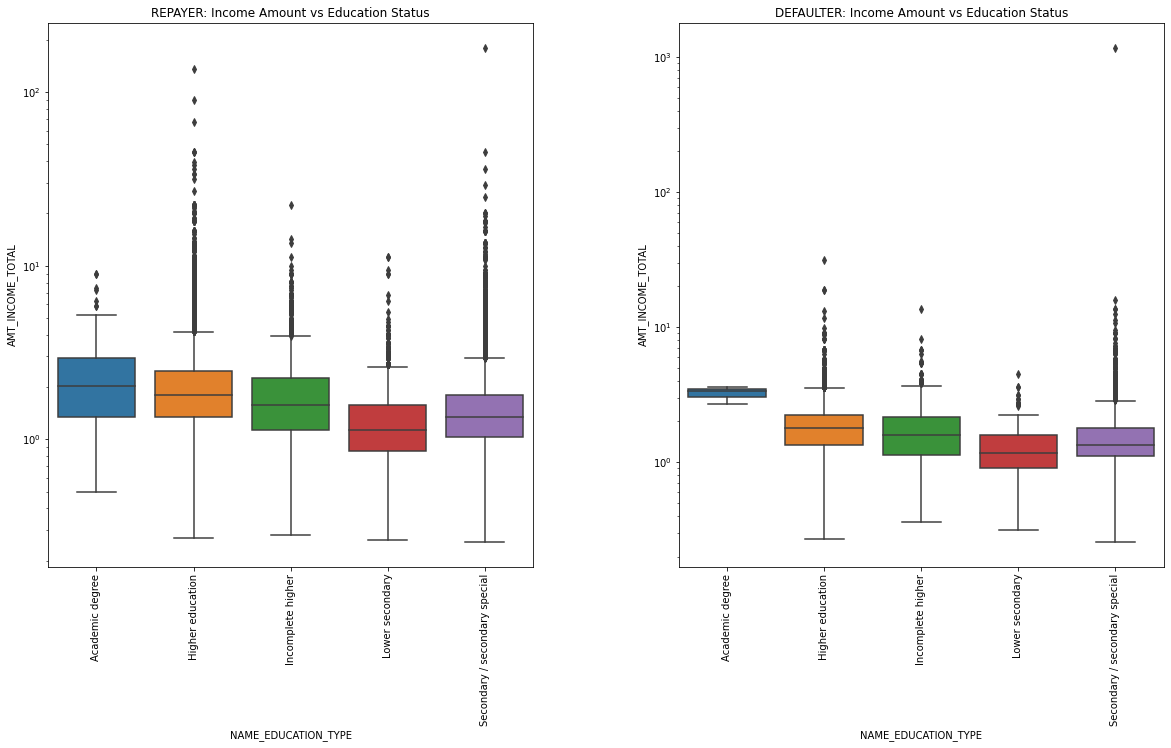

In [113]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)

plt.title("REPAYER: Income Amount vs Education Status")
plt.yscale("log")
sns.boxplot(y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE",data=repayer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)

plt.title("DEFAULTER: Income Amount vs Education Status")
plt.yscale('log')
sns.boxplot(y="AMT_INCOME_TOTAL",x="NAME_EDUCATION_TYPE",data=defaulter)
plt.xticks(rotation=90)
plt.show()

- academic degree has highest median of total income amount and have very few outliers.
- secondary education has lower median than higher education and incomplete higher education.

#### Income vs Family Status

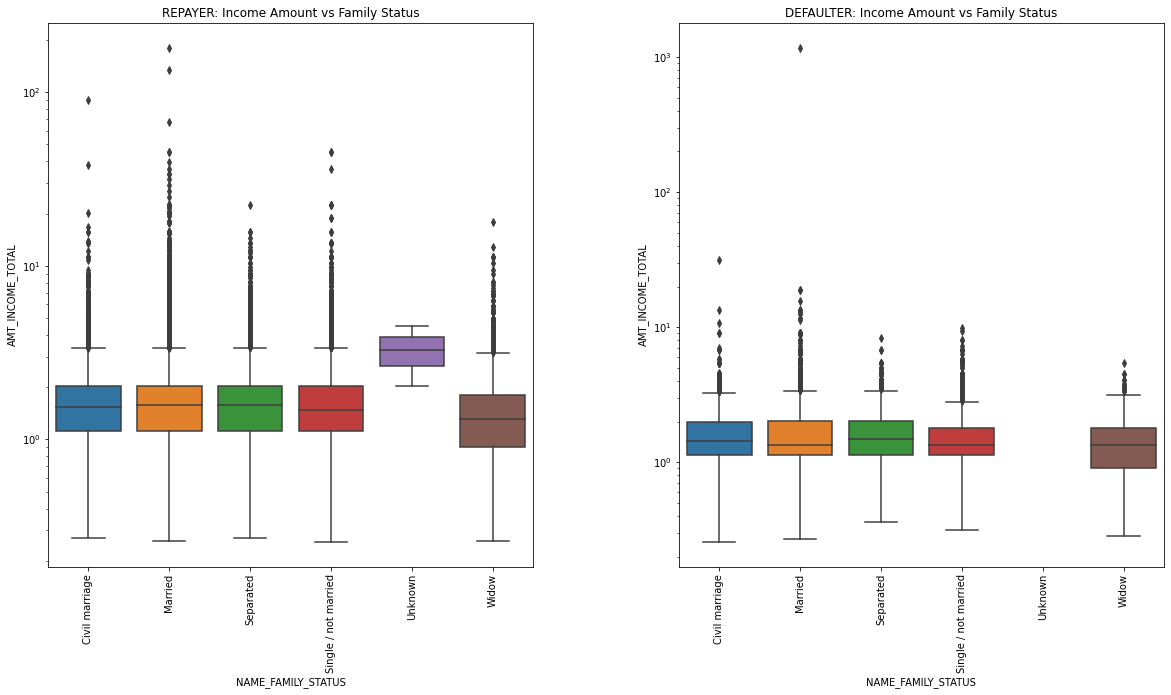

In [114]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)

plt.title("REPAYER: Income Amount vs Family Status")
plt.yscale("log")
sns.boxplot(y="AMT_INCOME_TOTAL",x="NAME_FAMILY_STATUS",data=repayer)
plt.xticks(rotation=90)
plt.subplot(1,2,2)

plt.title("DEFAULTER: Income Amount vs Family Status")
plt.yscale('log')
sns.boxplot(y="AMT_INCOME_TOTAL",x="NAME_FAMILY_STATUS",data=defaulter)
plt.xticks(rotation=90)
plt.show()

- civil marriage, married and separated have higher median of total income.
- married contains the most outliers amongst everyone.

### Univariate Analysis
- previous application dataset

#### Contract Type

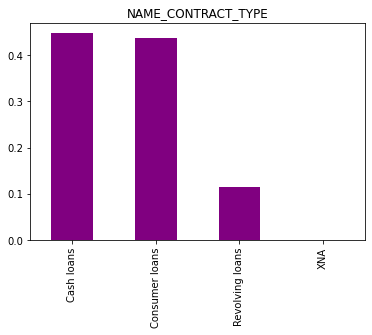

In [115]:
prev_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(color="purple")
plt.title("NAME_CONTRACT_TYPE")
plt.show()

- cash loans and consumer loans are applied more in numbers.

#### Payment Type

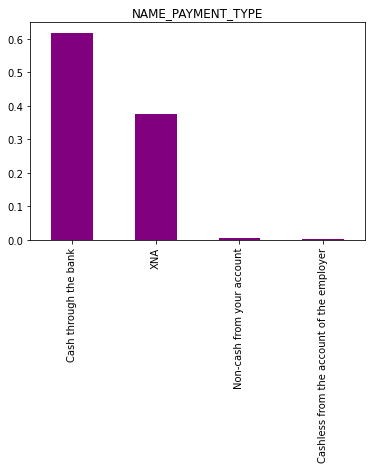

In [116]:
prev_df.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar(color="purple")
plt.title("NAME_PAYMENT_TYPE")
plt.show()

- most of the payment(60%) were made cash through the bank.
- a large portion (30%-40%) are also unavailable.

#### Client Type

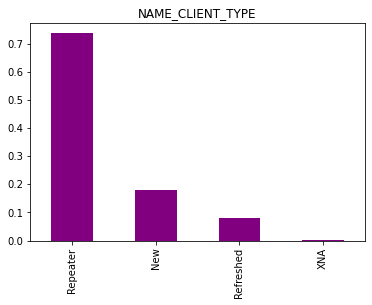

In [117]:
prev_df.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar(color="purple")
plt.title("NAME_CLIENT_TYPE")
plt.show()

- 70% of the client are repeater.
- 10%-20% are new clients.
- few are refreshed.

#### Application Amount

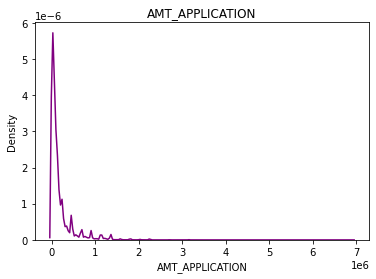

In [118]:
sns.distplot(prev_df["AMT_APPLICATION"],hist=False,color="purple")
plt.title("AMT_APPLICATION")
plt.show()

- most of the people have asked for the less credit on the previous application.

#### Credit Amount

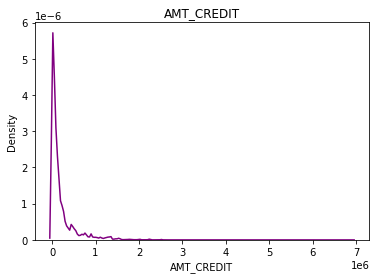

In [119]:
sns.distplot(prev_df["AMT_CREDIT"],hist=False,color="purple")
plt.title("AMT_CREDIT")
plt.show()

- most of the people are in low credit amount.

### Bi-Variate Analysis
Analyzing two variables at a time with the target variable.Here the target variable is NAME_CONTRACT_STATUS.

#### Status VS Credit

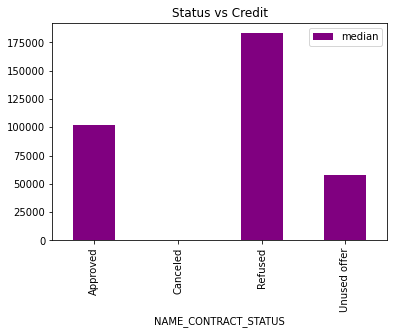

In [120]:
prev_df.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT"].aggregate(["median"]).plot.bar(color="purple")
plt.title("Status vs Credit")
plt.show()

- The refused credit amount median is higher than the approved one.

#### Status VS Application Amount

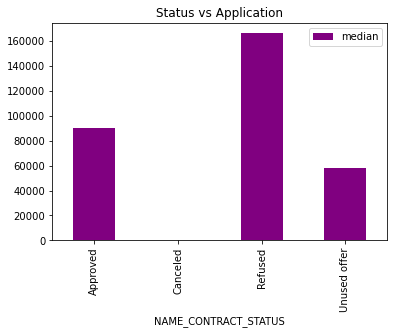

In [121]:
prev_df.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].aggregate(["median"]).plot.bar(color="purple")
plt.title("Status vs Application")
plt.show()


- the refused application credit amount median is also higher than the approved one.

#### Status VS Contract Type

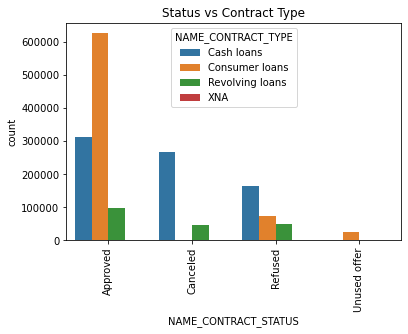

In [122]:
sns.countplot(x="NAME_CONTRACT_STATUS",hue="NAME_CONTRACT_TYPE",data=prev_df)
plt.title("Status vs Contract Type")
plt.xticks(rotation=90)
plt.show()

- most of the consumer loans were approved, none of them were canceled, few were refused.
- some cash loans were approved, some were refused and many were canceled as well.

#### Status VS Client Type

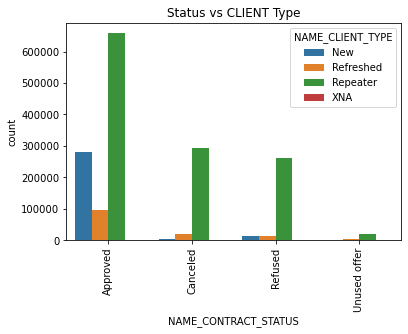

In [123]:
sns.countplot(x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE",data=prev_df)
plt.title("Status vs CLIENT Type")
plt.xticks(rotation=90)
plt.show()

- most of the repeater clients were approved, some were also canceled and refused.
- almost no new clients were neither canceled nor refused.
- very little of the refreshed clients were approve.

#### Status VS Payment Type

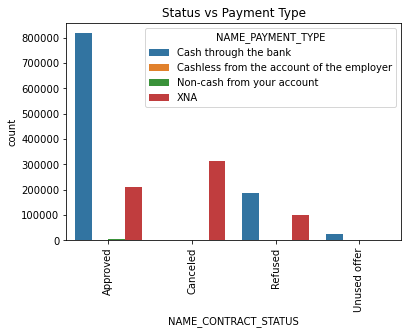

In [124]:
sns.countplot(x="NAME_CONTRACT_STATUS",hue="NAME_PAYMENT_TYPE",data=prev_df)
plt.title("Status vs Payment Type")
plt.xticks(rotation=90)
plt.show()

- almost all the payment made by the cash through the bank were approved, some of them were also canceled as well.
- cashless from the account and non cash from account are not found as they are very less in numbers.

### Merging Two Dataset

In [125]:
merged_df=pd.merge(app_df[["SK_ID_CURR","TARGET"]],prev_df[["SK_ID_CURR","NAME_CONTRACT_TYPE","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","AMT_CREDIT","AMT_APPLICATION"]],on="SK_ID_CURR",how="inner")

In [126]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,AMT_CREDIT,AMT_APPLICATION
0,100002,1,Consumer loans,XNA,New,179055.0,179055.0
1,100003,0,Cash loans,XNA,Repeater,1035882.0,900000.0
2,100003,0,Consumer loans,Cash through the bank,Refreshed,348637.5,337500.0
3,100003,0,Consumer loans,Cash through the bank,Refreshed,68053.5,68809.5
4,100004,0,Consumer loans,Cash through the bank,New,20106.0,24282.0


In [127]:
merged_df.shape

(1413701, 7)

### Creating Two Data Frame Based on Repayers & Defaulters

In [128]:
merged_repayers=merged_df[merged_df["TARGET"]==0]

In [129]:
merged_repayers.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,AMT_CREDIT,AMT_APPLICATION
1,100003,0,Cash loans,XNA,Repeater,1035882.0,900000.0
2,100003,0,Consumer loans,Cash through the bank,Refreshed,348637.5,337500.0
3,100003,0,Consumer loans,Cash through the bank,Refreshed,68053.5,68809.5
4,100004,0,Consumer loans,Cash through the bank,New,20106.0,24282.0
5,100006,0,Cash loans,Cash through the bank,Repeater,675000.0,675000.0


In [130]:
merged_defaulters=merged_df[merged_df["TARGET"]==1]

In [131]:
merged_defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,AMT_CREDIT,AMT_APPLICATION
0,100002,1,Consumer loans,XNA,New,179055.0,179055.0
161,100047,1,Revolving loans,XNA,Repeater,450000.0,0.0
162,100047,1,Cash loans,Cash through the bank,Refreshed,157500.0,157500.0
163,100047,1,Cash loans,Cash through the bank,Repeater,744498.0,675000.0
164,100047,1,Consumer loans,Cash through the bank,New,34384.5,38205.0


### Merged Data Analysis
Comparing some of the variables of previous application data with the TARGET variable of the application dataset.

#### Target VS Contract Type

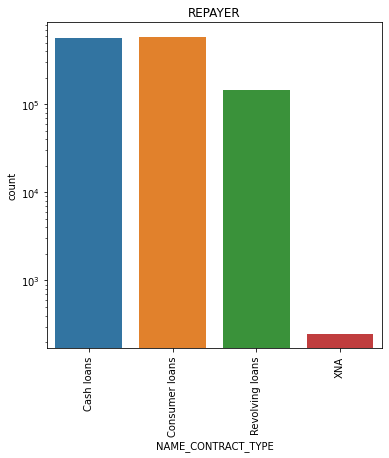

In [132]:
plt.figure(figsize=(6,6))
plt.yscale("log")
plt.title("REPAYER")
sns.countplot(merged_repayers["NAME_CONTRACT_TYPE"])
plt.xticks(rotation=90)
plt.show()

- Cash loans and Consumer loans applicants are more likely to repay the loan on time.

#### Target VS Client Type

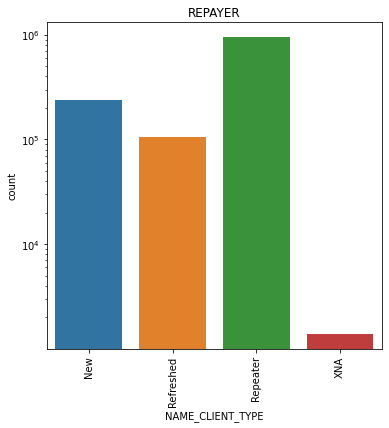

In [133]:
plt.figure(figsize=(6,6))
plt.yscale("log")
plt.title("REPAYER")
sns.countplot(merged_repayers["NAME_CLIENT_TYPE"])
plt.xticks(rotation=90)
plt.show()

- people who are most likely to repay the loan on time are a repeater type of client.

#### Target VS Payment Type

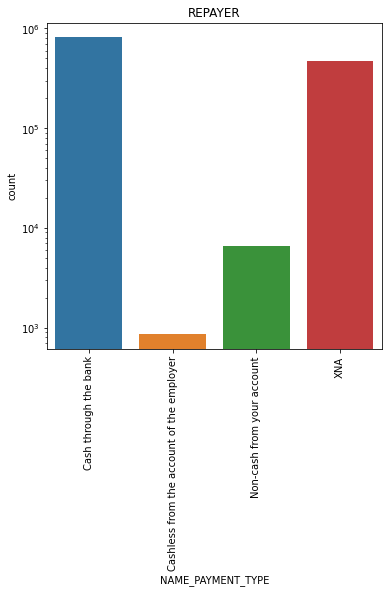

In [134]:
plt.figure(figsize=(6,6))
plt.yscale('log')
plt.title("REPAYER")
sns.countplot(merged_repayers["NAME_PAYMENT_TYPE"])
plt.xticks(rotation=90)
plt.show()

- most of the loan that were repaid on time was made by cash through the bank type.
- some are unavaible to be predicted.

#### Taget VS Credit Amount

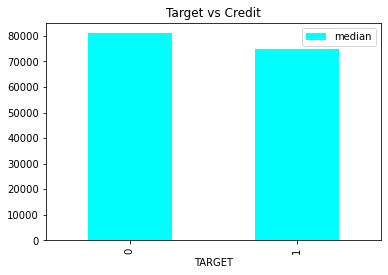

In [135]:
merged_df.groupby("TARGET")["AMT_CREDIT"].aggregate(["median"]).plot.bar(color="cyan")
plt.title("Target vs Credit")
plt.show()

- In terms of credit amount median of repaying the loan is higher than the defaulters.

#### Target VS Application Amount

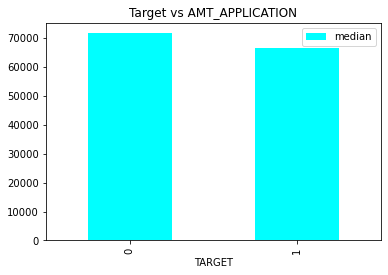

In [136]:
merged_df.groupby("TARGET")["AMT_APPLICATION"].aggregate(["median"]).plot.bar(color="cyan")
plt.title("Target vs AMT_APPLICATION")
plt.show()

- In terms of application amount median of repaying the loan is higher than the defaulters.

### Finding The Highest Correlations Between The Target Variable and Other Columns
Inorder to do that, we have to first make a list of all the columns and find out the correlation of each with the target variable and then plot it on a heatmap.

In [137]:
correlation=['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

repayer_df=app_df.loc[app_df["TARGET"]==0, correlation]
defaulter_df=app_df.loc[app_df["TARGET"]==1, correlation]

#### Repayer's Correlation

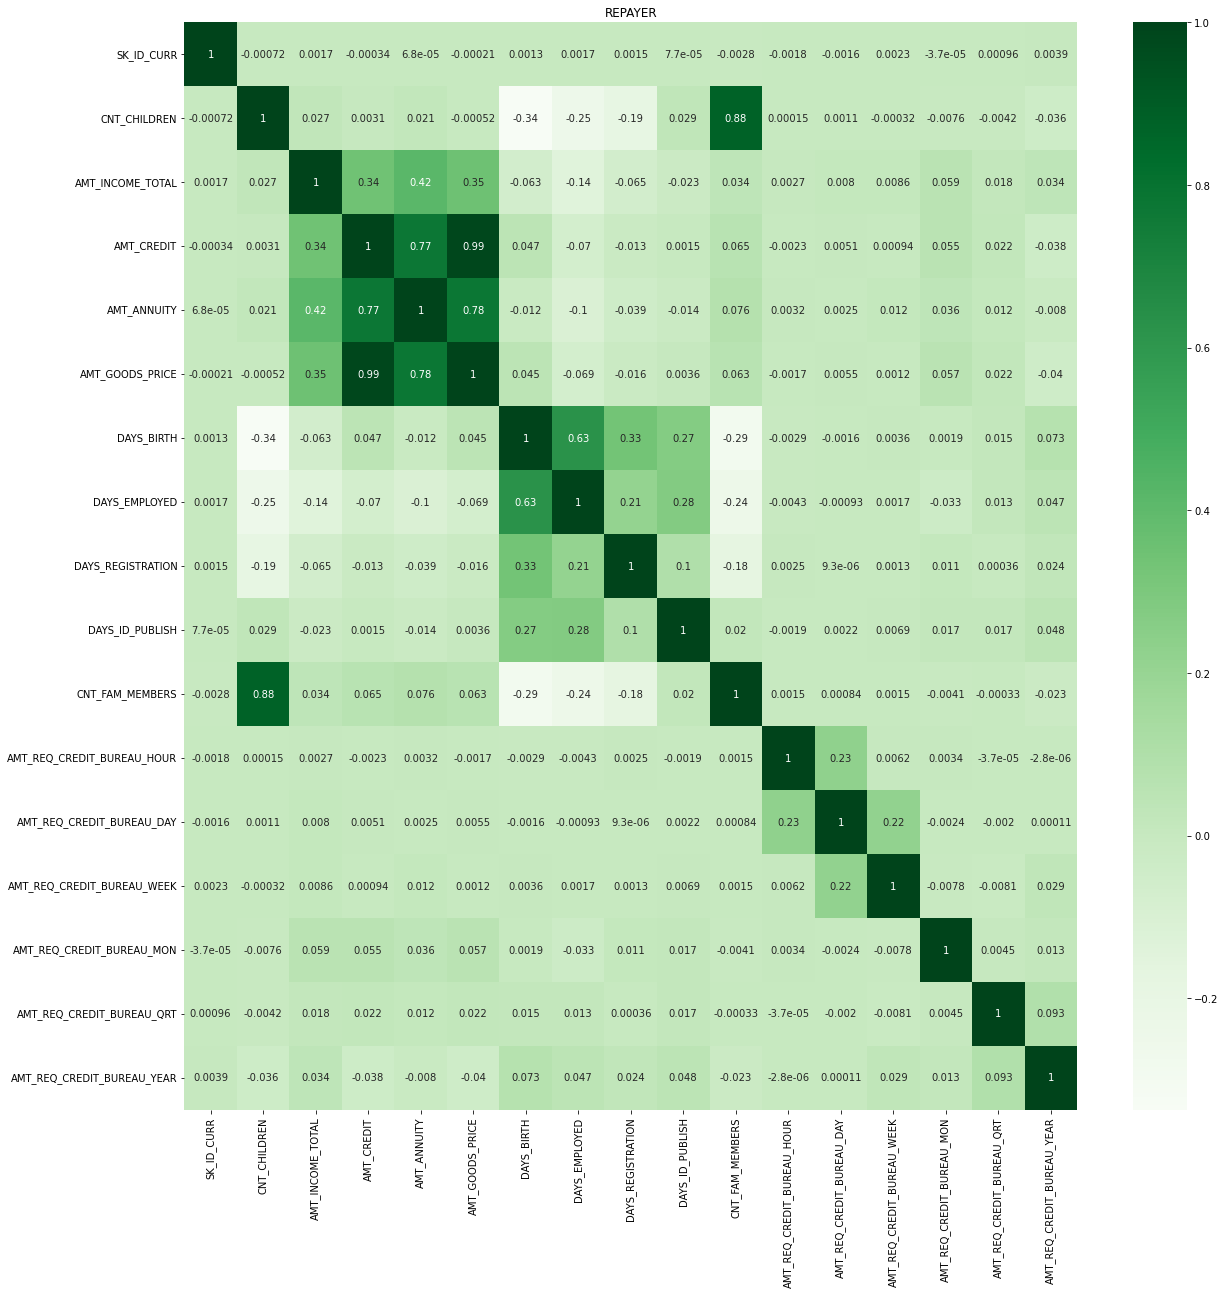

In [138]:
plt.figure(figsize=(20,20))
sns.heatmap(repayer_df.corr(),cmap="Greens",annot=True)
plt.title("REPAYER")
plt.show()

#### Defaulter's Correlation

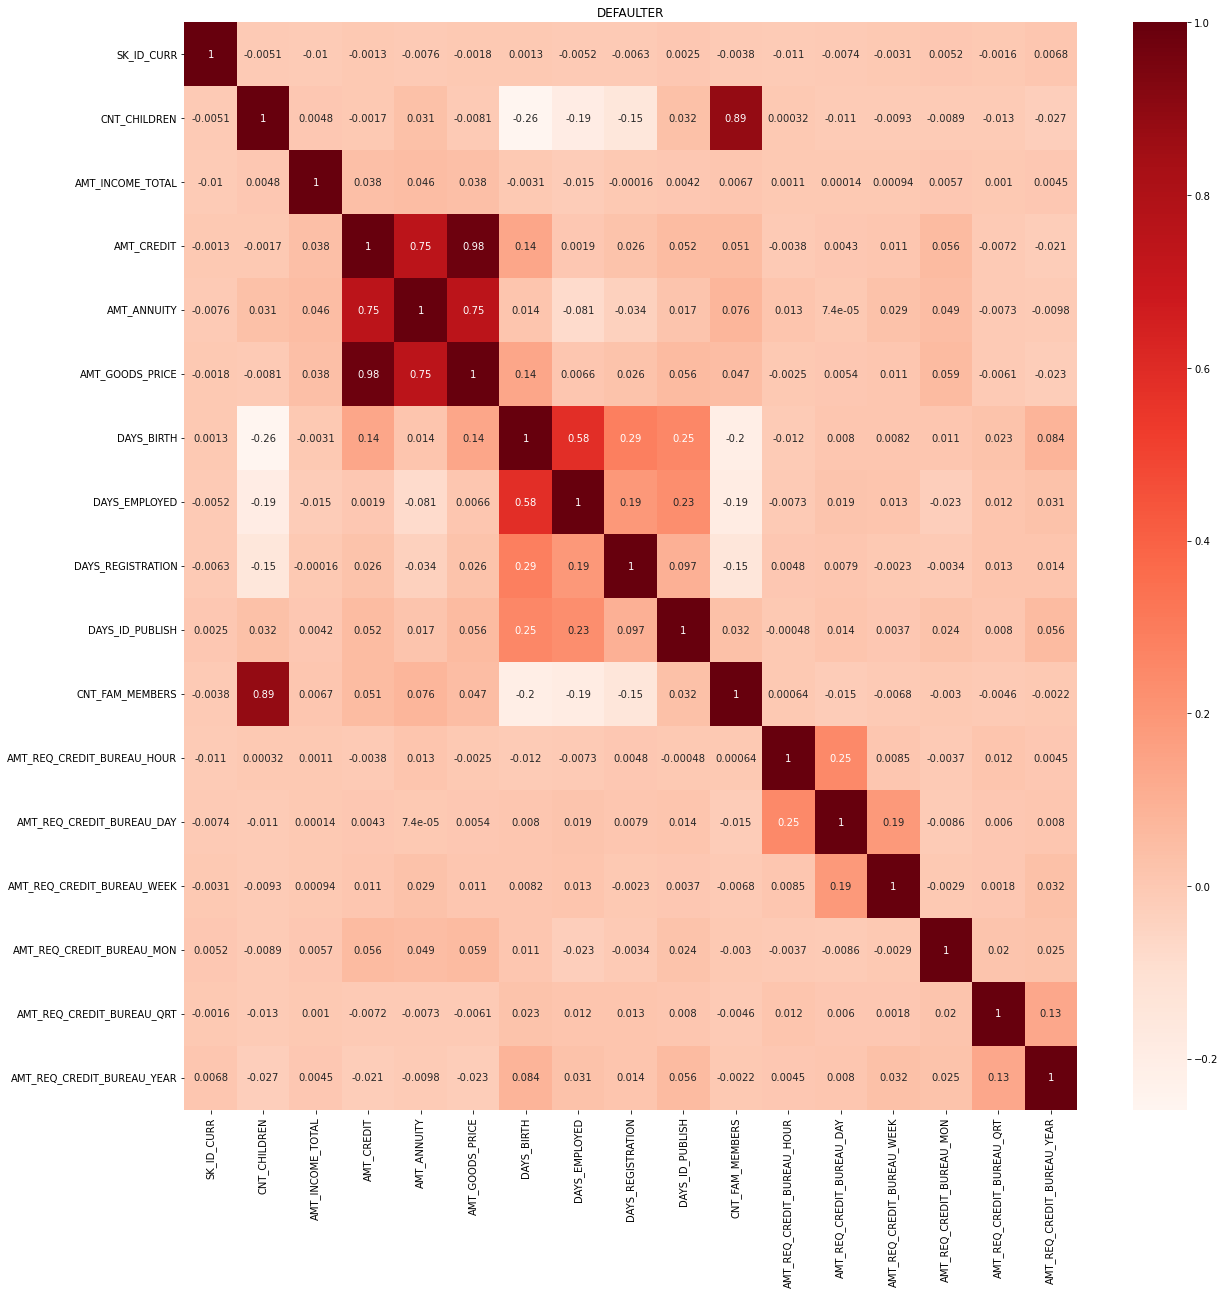

In [139]:

plt.figure(figsize=(20,20))
sns.heatmap(defaulter_df.corr(),cmap="Reds",annot=True)
plt.title("DEFAULTER")
plt.show()


### Top 10 Correlations:

- AMT_CREDIT & AMT_GOODS_PRICE: 0.99
- CNT_CHILDREN & CNT_FAM_MEMBERS: 0.88
- AMT_ANNUITY & AMT_GOODS_PRICE: 0.78
- AMT_CREDIT & AMT_ANNUITY: 0.77
- DAYS_BIRTH & DAYS_EMPLOYED: 0.63
- AMT_ANNUITY & AMT_INCOME_TOTAL: 0.42
- AMT_INCOME_TOTAL & AMT_GOODS_PRICE: 0.35
- AMT_CREDIT & AMT_INCOME_TOTAL: 0.34
- DAYS_REGISTRATION & DAYS_BIRTH: 0.33
- DAYS_ID_PUBLISH & DAYS_EMPLOYED: 0.28



### Inferences From Correlation Of Repayers

Credit Amount is hoghly correlated with
- annuity amount
- goods price
- total income amount

There is a high correlation between
- number of childrean and number of family members

We can also see that repayers have a high correlation with
- days employed

### Inferences From Correlation Of Defaulters

- loan annuity amount with credit resulted a little decrement when compared  with the defaulters.(0.77 to 0.75)
- annuity amount with total income amount resulted a high decline in defaulters (0.42 to 0.096)
- total income amount with goods price and credit amount also resulted a decline when compared with defaulters ( 0.35 to 0.038) 